In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Import CSV file of education data
Austin_file = "../Resources/Census.gov/By_Year/Merged_datasets/Austin_census_merged_clean.csv"

pop_csv = pd.read_csv(Austin_file)

Austin_df = pd.DataFrame(pop_csv)
Austin_df.head()

,Zipcode,Education (No Schooling)_2012,Education (High School)_2012,Education (GED)_2012,Education (Associate's)_2012,Education (Bachelor's)_2012,Education (Master's)_2012,Education (Master's)_2012.1,Education (Doctorate)_2012,Education (No Schooling)_2013,...,Female_2017,Poverty White_2018,Poverty Black_2018,Poverty American Indian_2018,Poverty Asian_2018,Poverty Hispanic_2018,Poverty Two or More Races_2018,Total Poverty Count_2018,Poverty Male_2018,Female_2018
0,78610,40,2859,606,1093,3750,1135,112,104,34,...,1466,2081,72,0,0,11,16,2381,1024,1357
1,78613,122,5852,998,3123,13532,3759,781,513,78,...,1589,2984,70,0,244,0,222,3617,1763,1854
2,78617,459,2564,735,503,1089,118,20,0,474,...,2621,1785,316,16,14,0,71,4022,1661,2361
3,78641,328,5425,1430,2635,6670,1942,277,226,405,...,2204,3335,481,0,69,0,109,4027,1873,2154
4,78652,27,685,46,180,1049,247,17,3,25,...,237,554,14,0,0,0,0,568,290,278


### Population Growth



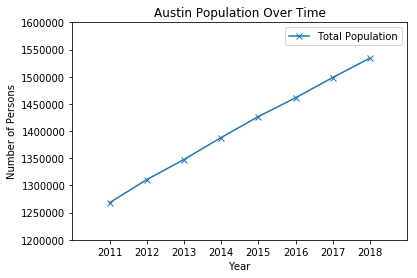

In [3]:
# Populations
populations = [Austin_df["Population_2011"].sum(), Austin_df["Population_2012"].sum(), Austin_df["Population_2013"].sum(), 
               Austin_df["Population_2014"].sum(), Austin_df["Population_2015"].sum(), Austin_df["Population_2016"].sum(),
               Austin_df["Population_2017"].sum(), Austin_df["Population_2018"].sum()]

years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

# Generate line plot
plt.plot(years, populations, marker="x", label="Total Population")
plt.title("Austin Population Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Persons")
plt.xlim(-1, 8)
plt.ylim(1200000, 1600000)


plt.legend()
plt.savefig("../Output_Data/Demographics/Population_growth_line.png")

In [4]:
total_df = Austin_df[["Population_2011", "Population_2012", "Population_2013",
                       "Population_2014", "Population_2015", "Population_2016",
                       "Population_2017", "Population_2018"]]

In [5]:
total_df = total_df.transpose()

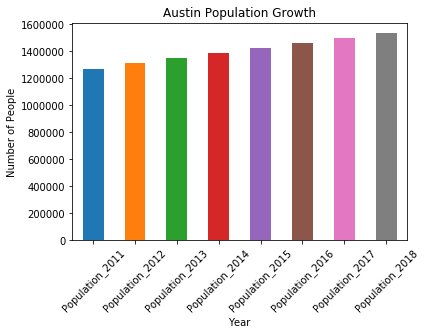

In [6]:
total_df["Sum"] = total_df.sum(axis=1)
Sum = total_df["Sum"]
Sum.plot(kind="bar")

# Set tick locations and names
plt.xticks(rotation=45)

# Set a Title and labels
plt.title("Austin Population Growth")
plt.xlabel("Year")
plt.ylabel("Number of People")

plt.savefig("../Output_Data/Demographics/Population_growth_bar.png")

### Population Distribution

In [7]:
# Transpose data
Austin_df = Austin_df.transpose()

In [8]:
# Define function to pull population total for a given year

def pop_year(year):
    # Set year to input
    year = year
    
    # Pull race/ethnic group data for that year
    white_year = Austin_df.loc[f"Population (White Alone)_{year}"].sum()
    black_year = Austin_df.loc[f"Population (Black Alone)_{year}"].sum()
    indian_year = Austin_df.loc[f"Population (American Indian or Alaskan Native Alone)_{year}"].sum()
    asian_year = Austin_df.loc[f"Population (Asian Alone)_{year}"].sum()
    hawaiian_year = Austin_df.loc[f"Population (Native Hawaiian and Other Pacific Islander Alone)_{year}"].sum()
    
    other = indian_year + hawaiian_year
    
    # join to a list
    year_list = [white_year, black_year, asian_year, other]
    
    return year_list

In [9]:
# Define function to make a bar graph to show disribution for a given year

def pop_graph_year(year):
    # Set year to input
    year = year

    # Set data to plot
    labels = ["White", "Black", "Asian", "Other"]
    size = pop_year(year)

    # Set colors
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

    # Create plot
    plt.bar(labels, size, align="center", color=colors, width=0.8)

    # Set a Title and labels
    plt.title(f"Austin Population Distribution {year}")
    plt.xlabel("Race/Ethnicity")
    plt.ylabel("Number of People")

    return

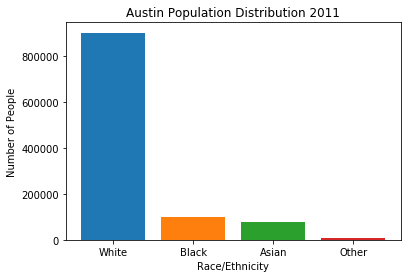

In [10]:
pop_graph_year(2011)
plt.savefig("../Output_Data/Demographics/Population_distribution_2011.png")

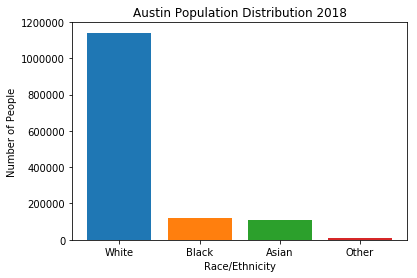

In [11]:
pop_graph_year(2018)
plt.savefig("../Output_Data/Demographics/Population_distribution_2018.png")

### Poverty

In [12]:
# Define function to pull poverty count for a given year

def poverty_year(year):
    # Set year to input
    year = year
    
    # Pull race/ethnic group data for that year
    white_year = Austin_df.loc[f"Poverty White_{year}"].sum()
    black_year = Austin_df.loc[f"Poverty Black_{year}"].sum()
    indian_year = Austin_df.loc[f"Poverty American Indian_{year}"].sum()
    asian_year = Austin_df.loc[f"Poverty Asian_{year}"].sum()
    hispanic_year = Austin_df.loc[f"Poverty Hispanic_{year}"].sum()
    biracial_year = Austin_df.loc[f"Poverty Two or More Races_{year}"].sum()
    
    # join to a list
    year_list = [white_year, black_year, asian_year, indian_year, hispanic_year, biracial_year]
    
    return year_list

In [13]:
# Define function to make a bar graph to show poverty disribution for a given year

def poverty_graph_year(year):
    # Set year to input
    year = year

    # Set data to plot
    labels = ["White", "Black", "Asian", "Am. Ind.", "Hispanic", "Biracial"]
    size = poverty_year(year)

    # Set colors
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:pink", "tab:gray"]

    # Create plot
    plt.bar(labels, size, align="center", color=colors, width=0.8)

    # Set a Title and labels
    plt.title(f"Austin Poverty Distribution by Race {year}")
    plt.xlabel("Race/Ethnicity")
    plt.ylabel("Number of People")

    return

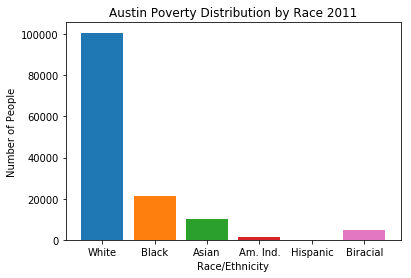

In [14]:
poverty_graph_year(2011)
plt.savefig("../Output_Data/Demographics/Poverty_distribution_2011.png")

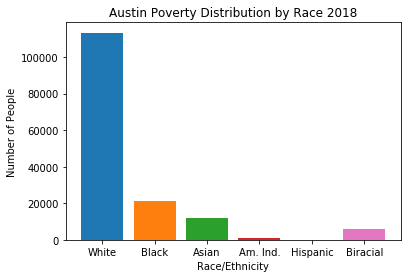

In [15]:
poverty_graph_year(2018)
plt.savefig("../Output_Data/Demographics/Poverty_distribution_2018.png")

In [16]:
# Calculate percentage living in poverty by race
def poverty_percent(race, year):
    
    # Set variable to hold sum of selected race living below poverty line
    poverty = Austin_df.loc[f"Poverty {race}_{year}"].sum()

    # Set variable to hold total of selected race 
    total = Austin_df.loc[f"Population ({race} Alone)_{year}"].sum()
    
    # Calculate percent living below poverty line
    percent = round((poverty/total), 2)*100
    
    return percent

In [17]:
# Define a function to graph poverty levels over time

def poverty_stats(year):
    # Calculate poverty stats by race/ethnicity
    white_poverty = poverty_percent("White", year)
    black_poverty = poverty_percent("Black", year)
    asian_poverty = poverty_percent("Asian", year)
    
    # Calculate total poverty
    total_poverty = Austin_df.loc[f"Total Poverty Count_{year}"].sum()
    total_year = Austin_df.loc[f"Population_{year}"].sum()
    
    # Calculate total poverty percent
    total_percent = round((total_poverty/total_year), 2)*100
    
    # Join all poverty stats to a list
    
    poverty_year = [total_percent, white_poverty, black_poverty, asian_poverty]
    
    return poverty_year

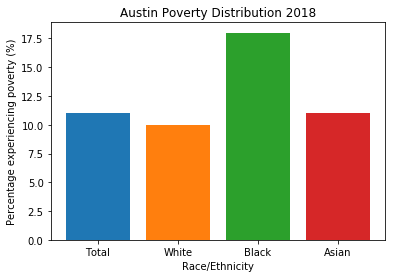

<Figure size 432x288 with 0 Axes>

In [23]:



# Set variables to hold poverty dat
poverty_data = poverty_stats(2018)

# Set data to plot
labels = ["Total", "White", "Black", "Asian"]

# Set colors
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

# Create plot
plt.bar(labels, poverty_data, align="center", color=colors, width=0.8)

# Set a Title and labels
plt.title(f"Austin Poverty Distribution 2018")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Percentage experiencing poverty (%)")

# Set x limit
# plt.xlim(-1, 5)
# plt.ylim(-1, 1)

plt.show()

plt.savefig("../Output_Data/Demographics/Poverty_distribution_2018.png")

In [20]:
# define function to get all poverty data by year

def poverty_race_year(race):
    
    poverty_list = []

    for year in range(2011, 2019):
        if race == "Total":
            # Calculate total poverty
            total_poverty = Austin_df.loc[f"Total Poverty Count_{year}"].sum()
            total_year = Austin_df.loc[f"Population_{year}"].sum()

            # Calculate total poverty percent
            total_percent = round((total_poverty/total_year), 2)*100
            stat = total_percent
            
        else:
            stat = poverty_percent(race, year)
        
        # Append stat to list
        poverty_list.append(stat)
    
    return poverty_list


In [21]:
# Create a graph showing poverty level changes over time 

# Enter year data
poverty_white = poverty_race_year("White")
poverty_black = poverty_race_year("Black")
poverty_asian = poverty_race_year("Asian")
poverty_total = poverty_race_year("Total")

years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

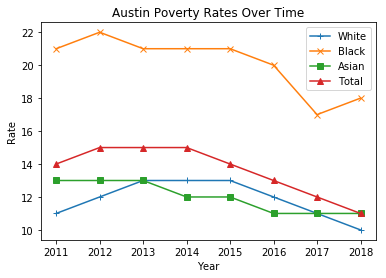

In [22]:
# Set handles
white, = plt.plot(years, poverty_white, marker="+", label="White")
black, = plt.plot(years, poverty_black, marker="x", label="Black")
asian, = plt.plot(years, poverty_asian, marker="s", label="Asian")
total, = plt.plot(years, poverty_total, marker="^", label="Total")

# Set legend to where the chart thinks is best
plt.legend(handles=[white, black, asian, total], loc="best")

# Set labels
plt.title("Austin Poverty Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Rate")

plt.savefig("../Output_Data/Demographics/Poverty_rates_over_time.png")